<img src="https://github.com/Hubnester11/IA-Proyect/blob/main/RestauranteIA.jfif?raw=true"  width="1100px" height="400px">

In [30]:
import pandas as pd #importar librerias necesarias para el codigo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score, confusion_matrix, plot_confusion_matrix

In [2]:
from google.colab import drive #acceso al database
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
res1 = pd.read_csv("/content/drive/MyDrive/ai-uis-student/data/restaurante.csv")  #codigo para subir el drive
print(res1.shape)
res1.head()

(1541, 13)


,Order_ID,TAKEAWAY/SEATING/PICKUP,DATE,DAY,TIME,SERVER,ITEM,QUANTITY,PRICE,TOTAL,ALLERGIES,FOOD TYPE,WEEK NUMBER
0,139017,SEAT,19-06-2020,FRIDAY,4:02 PM,JILLIAN N.,FISH & CHIPS 2 PIECE,1,22,22,NO,ENTRÉE,WEEK 1
1,138938,SEAT,19-06-2020,FRIDAY,11:29 AM,ASHLEY C.,FAST FARE BREAKFAST,1,10,10,NO,BREAKFAST,WEEK 1
2,138938,SEAT,19-06-2020,FRIDAY,11:29 AM,ASHLEY C.,CHIC COBB SALAD SMALL,1,14,14,NO,SALAD,WEEK 1
3,138938,SEAT,19-06-2020,FRIDAY,11:29 AM,ASHLEY C.,THAI PRAWN SALAD LARGE,1,18,18,NO,SALAD,WEEK 1
4,138908,TAKEAWAY,19-06-2020,FRIDAY,9:46 AM,ASHLEY C.,FAST FARE BREAKFAST,1,10,10,NO,BREAKFAST,WEEK 1


In [4]:
res1['FOOD TYPE'].value_counts() #saber Cantidad de veces de tipo de comida

BREAKFAST               402
STARTERS                272
SANDWHICHES             240
SIDE / ADD ON           134
RICE BOWLS AND PASTA    123
SALAD                   120
SOUP                     80
ENTRÉE                   71
JUNIOR MENU              38
DESSERTS                 24
PIZZA                    21
SPECIALS                 15
Name: FOOD TYPE, dtype: int64

In [5]:
res1['FOOD TYPE'].replace({"BREAKFAST": 1,"STARTERS": 2,"SANDWHICHES": 3,"SIDE / ADD ON": 4,"RICE BOWLS AND PASTA": 5,"SALAD": 6,"SOUP": 7,"ENTRÉE": 8,"JUNIOR MENU": 9,"DESSERTS": 10,"PIZZA": 11,"SPECIALS": 12},inplace = True)

In [6]:
res1['FOOD TYPE'].value_counts() #saber Cantidad de veces de tipo de comida

1.0     402
2.0     272
3.0     240
4.0     134
5.0     123
6.0     120
7.0      80
8.0      71
9.0      38
10.0     24
11.0     21
12.0     15
Name: FOOD TYPE, dtype: int64

In [7]:
res1['DAY'].replace({"MONDAY": 1,"TUESDAY": 2,"WEDNESDAY": 3,"THURSDAY": 4,"FRIDAY": 5,"SATURDAY": 6,"SUNDAY": 7},inplace = True) #cambio tipo de dato, string a int, la semana se inicia el lunes

In [8]:
res1['WEEK NUMBER'].replace({"WEEK 1": 1,"WEEK 2": 2,"WEEK 3": 3,"WEEK 4": 4,"WEEK 5": 5},inplace = True) #cambio tipo de dato, string a int

In [9]:
res1['DATE'].replace({"19-06-2020": 1,"20-06-2020": 2,"21-06-2020": 3,"24-06-2020": 4,"25-06-2020": 5,"26-06-2020": 6,"27-06-2020": 7,"28-06-2020": 8,"29-06-2020": 9,"01-07-2020": 10,"02-07-2020": 11,"03-07-2020": 12,
                        "04-07-2020": 13,"05-07-2020": 14,"06-07-2020": 15,"07-07-2020": 16,"08-07-2020": 17,"10-07-2020": 18,"11-07-2020": 19,"12-07-2020": 20,"13-07-2020": 21,"14-07-2020": 22,"15-07-2020": 23,"17-07-2020": 24,
                        "18-07-2020": 25,"19-07-2020": 26,"20-07-2020": 27,"21-07-2020": 28, "22-07-2020": 29},inplace = True)

In [10]:
res1['TAKEAWAY/SEATING/PICKUP'].replace({"SEAT": 1,"TAKEAWAY": 2,"TAKEWAY": 2,"PICKUP": 3},inplace = True)

In [11]:
#verificacion de nuevos valores para tipo de comida, dia y numero de semana
res1.tail(10)

,Order_ID,TAKEAWAY/SEATING/PICKUP,DATE,DAY,TIME,SERVER,ITEM,QUANTITY,PRICE,TOTAL,ALLERGIES,FOOD TYPE,WEEK NUMBER
1531,146308,1,29,3,3:22 PM,ASHLEY C.,BEEF DIP SANDWHICH,1,15,15,NO,3.0,5
1532,146308,1,29,3,3:22 PM,ASHLEY C.,FISH & CHIPS 1 PIECE,1,14,14,NO,8.0,5
1533,146267,1,29,3,2:22 PM,JILLIAN N.,TRIPLE PEPPERONI FLATBRD,1,15,15,NO,11.0,5
1534,146267,1,29,3,2:22 PM,JILLIAN N.,STEAK SANDWHICH,1,25,25,NO,3.0,5
1535,146263,1,29,3,1:44 PM,JILLIAN N.,FAST FARE BREAKFAST,1,10,10,NO,1.0,5
1536,146238,1,29,3,12:49 PM,JILLIAN N.,CHICKEN GYOZA,1,14,14,NO,2.0,5
1537,146238,1,29,3,12:49 PM,JILLIAN N.,SALT & PEPPER PORK RIBS,1,14,14,NO,2.0,5
1538,146254,2,29,3,1:19 PM,DEB D.,CHICKEN WINGS,2,14,28,NO,2.0,5
1539,146254,2,29,3,1:19 PM,DEB D.,CHICKEN GYOZA,1,14,14,NO,2.0,5
1540,146253,1,29,3,2:18 PM,JILLIAN N.,NACHOS LARGE,1,20,20,NO,2.0,5


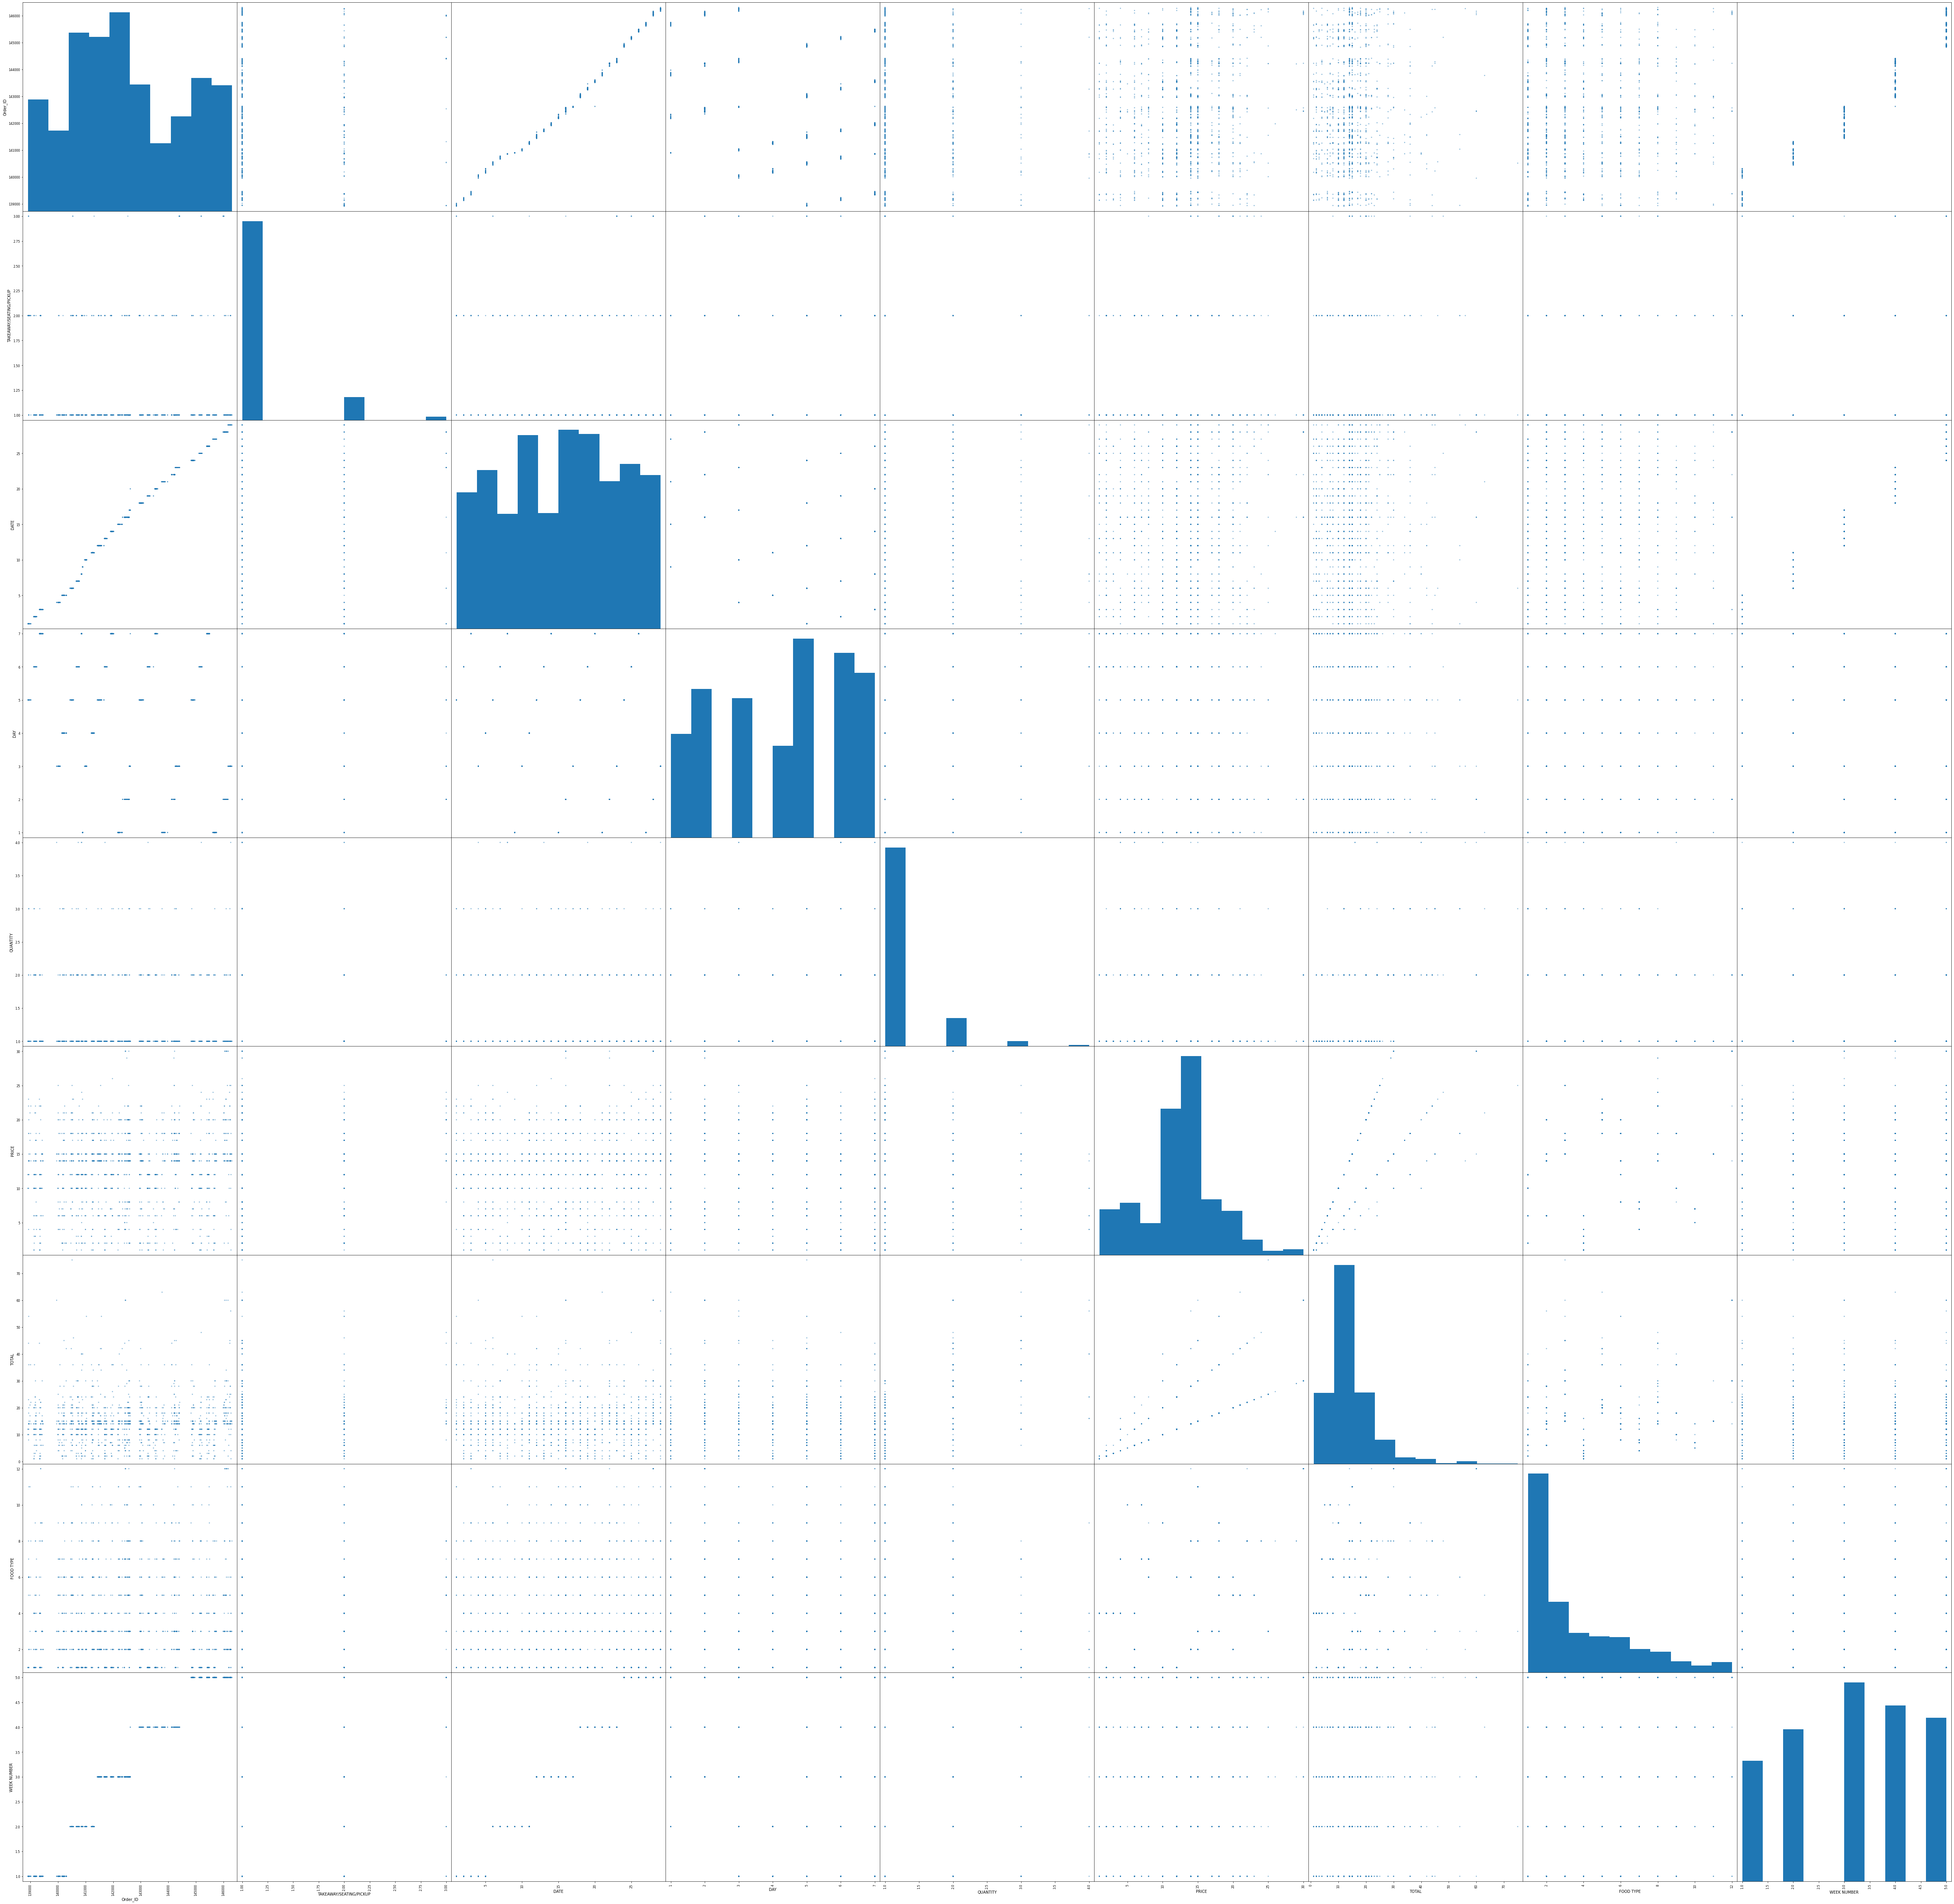

In [12]:
pd.plotting.scatter_matrix(res1, figsize=(90,90)); #revisar redundancia

In [13]:
item = res1['ITEM'].value_counts() #saber Cantidad de veces de un plato de comida
len(item)
#item.sort_index(ascending= True)

106

In [14]:
x = res1['ITEM'].value_counts()
print(x)

FAST FARE BREAKFAST             142
TWO EGGS ANY STYLE               60
WILLOW CLUB HOUSE SANDWHICH      57
BUFFALO CHIC WRAPS               56
BEEF DIP SANDWHICH               49
                               ... 
SUNDAY - STEAK & PRAWNS           1
BALSAMIC CHICKEN SALAD SMALL      1
PAN FRIED MAHI MAHI               1
SUNDAY - HAZELNUT HALIBUT         1
CASHEW BEEF STIR FRY              1
Name: ITEM, Length: 106, dtype: int64


In [ ]:
y =res1[['ITEM','DAY']].value_counts().sort_index(ascending= True) #organizacion platos x dia
pd.set_option("display.max_rows", None)
print(y)

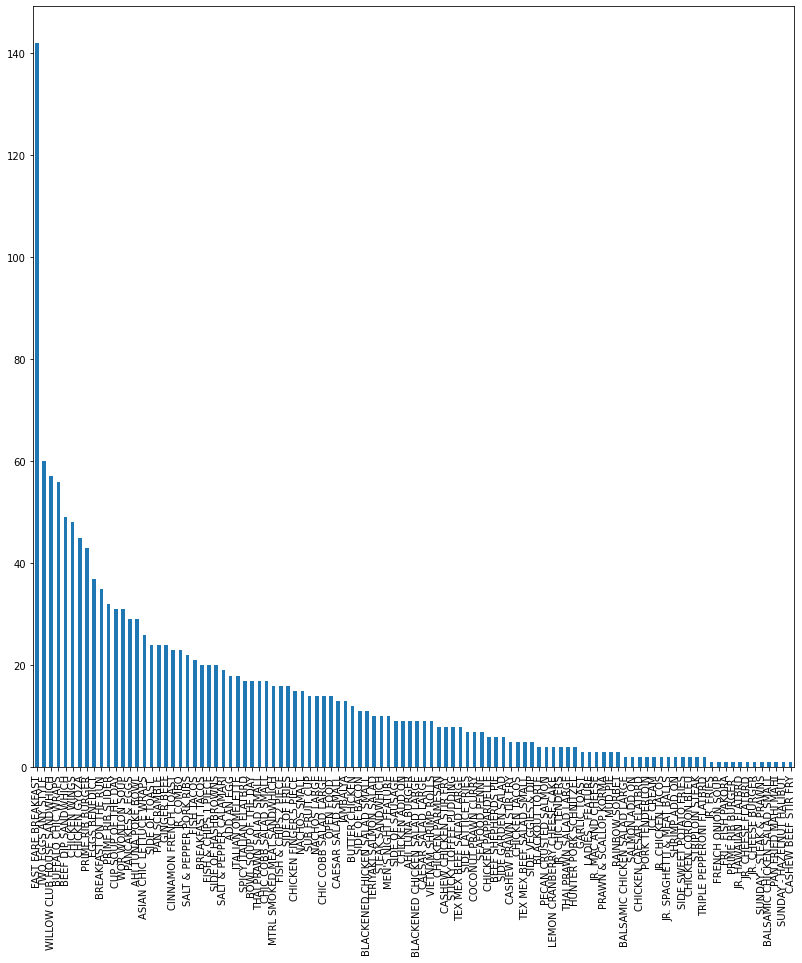

In [16]:
plt.figure(figsize = (30, 14))
ax= plt.subplot(1,2,1)
res1['ITEM'].value_counts().plot(kind='bar');

In [17]:
data = shuffle(res1)
X = data[['DAY','QUANTITY','DATE']]
y = data['FOOD TYPE']
X = X.fillna(0)
y = y.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

est = RandomForestClassifier(n_estimators=20, criterion="entropy")
est.fit(X_train,y_train)
score = est.score(X_test,y_test)

In [18]:
def show_curve(est, X, y):
    means, stds = [], []
    nfolds_range = range(2,50)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

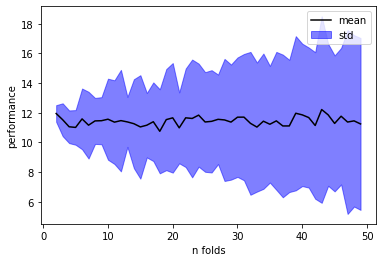

In [19]:
show_curve(est, X_test, y_test) #nfold para ver la desviacion estandar

In [ ]:
for i in np.unique(y_test):
    print(i, np.sum(y_test==i))

for i in np.unique(y_train):
    print(i, np.sum(y_train==i))

In [21]:
min_samples_leaf = range(2, 32)
means, stds = [], []

for i in min_samples_leaf:
    est = RandomForestClassifier(max_depth=4, min_samples_split=29, criterion='entropy', min_samples_leaf = i)
    s = cross_val_score(est, X, y, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

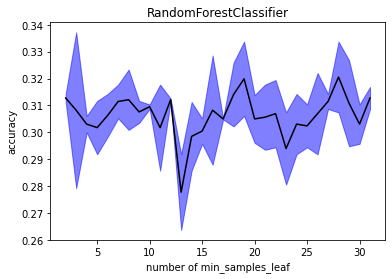

In [22]:
plt.plot(min_samples_leaf, means, color="black")
plt.fill_between(min_samples_leaf, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of min_samples_leaf")
plt.ylabel("accuracy")
plt.title("RandomForestClassifier")
plt

In [23]:
min_samples_split = range(2, 32)
means, stds = [], []

for i in min_samples_split:
    est = RandomForestClassifier(max_depth=4, min_samples_split=i, criterion='entropy')
    s = cross_val_score(est, X, y, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

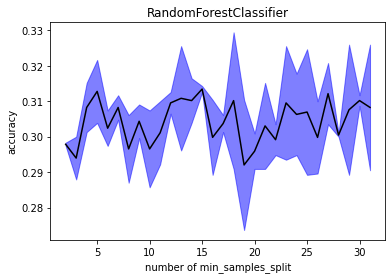

In [24]:
plt.plot(min_samples_split, means, color="black")
plt.fill_between(min_samples_split, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of min_samples_split")
plt.ylabel("accuracy")
plt.title("RandomForestClassifier")
plt

In [25]:
depth = range(2, 32)
means, stds = [], []

for i in depth:
    est = RandomForestClassifier(max_depth=i, criterion='entropy')
    s = cross_val_score(est, X, y, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

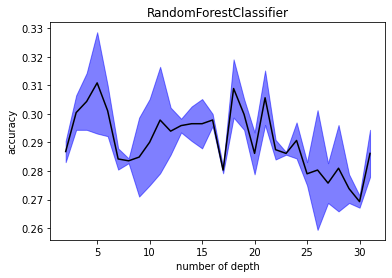

In [26]:
plt.plot(depth, means, color="black")
plt.fill_between(depth, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of depth")
plt.ylabel("accuracy")
plt.title("RandomForestClassifier")
plt

In [27]:
est = RandomForestClassifier()
est.fit(X_train, y_train)

predictions1 = est.predict(X_train)
predictions2 = est.predict(X_test)

score1 = np.mean(predictions1 == y_train)
score2 = np.mean(predictions2 == y_test)

cm_train = confusion_matrix(y_train, predictions1)
cm_test = confusion_matrix(y_test, predictions2)

print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)

print("Puntaje para train: ", score1)
print("Puntaje para test: ", score2)

matrix de confusión en train
 [[196  33  11   2   2   1   1   0   0   0   0   0]
 [ 49  86  24   0   1   0   0   0   0   0   0   0]
 [ 48  50  58   1   0   0   0   0   0   0   0   2]
 [ 41  14   9   5   1   0   0   1   0   0   0   0]
 [ 18  29  18   0   3   0   0   1   0   0   0   0]
 [ 24  25  17   1   0   3   0   0   0   0   0   1]
 [ 13  16  12   1   1   0   3   0   0   0   0   3]
 [ 10  18  10   1   0   0   0   3   0   0   0   1]
 [  8  10   4   0   0   0   0   0   0   0   0   0]
 [  3   6   4   0   0   0   0   0   0   0   0   1]
 [  2   9   2   0   0   0   0   0   0   0   0   0]
 [  1   0   2   0   0   0   0   0   0   0   0   4]]
matrix de confusión en test
 [[  0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0 114  31   7   0   0   1   0   2   0   0   0   1]
 [  0  35  46  27   1   2   0   0   0   0   0   0   1]
 [  0  32  35  12   1   0   0   1   0   0   0   0   0]
 [  0  40  15   5   1   0   1   0   0   0   0   0   1]
 [  0  10  23  19   0   1   1   0   0   0   0   0   0

In [28]:
pip install scikit-plot

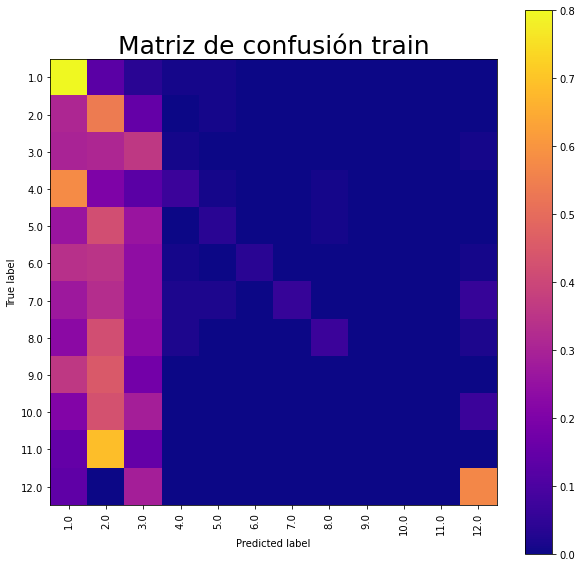

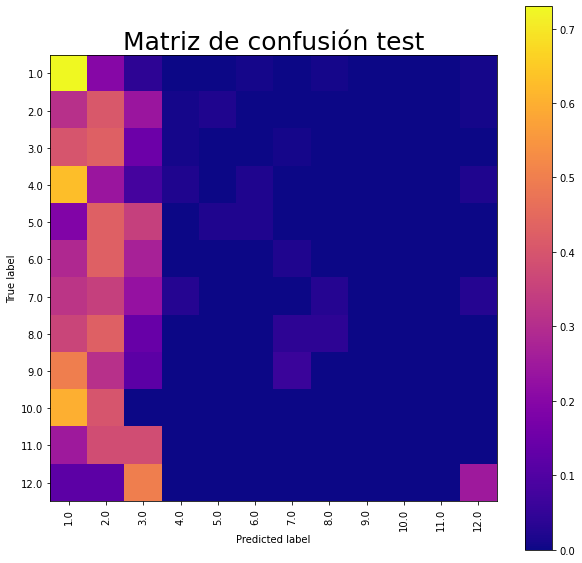

In [29]:
import scikitplot as skplt
muestra = [1,2,3,4,5,6,7,8,9,10,11,12]
conf_mat = skplt.metrics.plot_confusion_matrix(y_train, predictions1,normalize=True,hide_counts=True,figsize=(10,10),title="Matriz de confusión train",title_fontsize=25,cmap="plasma",true_labels=muestra,pred_labels=muestra,x_tick_rotation=90)
plt.show() 

import scikitplot as skplt
muestra = [1,2,3,4,5,6,7,8,9,10,11,12]
conf_mat = skplt.metrics.plot_confusion_matrix(y_test, predictions2,normalize=True,hide_counts=True,figsize=(10,10),title="Matriz de confusión test",title_fontsize=25,cmap="plasma",true_labels=muestra,pred_labels=muestra,x_tick_rotation=90)
plt.show() 